In [100]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_csv('fer2013.csv')

In [102]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [103]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [104]:
df.shape

(35887, 3)

In [105]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [106]:
# check missing values
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [107]:
# calue Count Emotion
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

<Axes: >

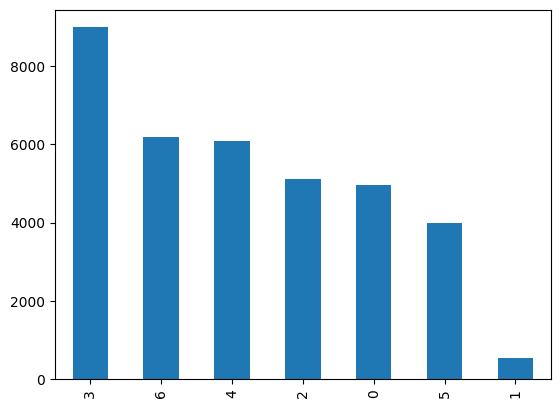

In [108]:
# calue Count EMotion
df['emotion'].value_counts().plot(kind='bar')

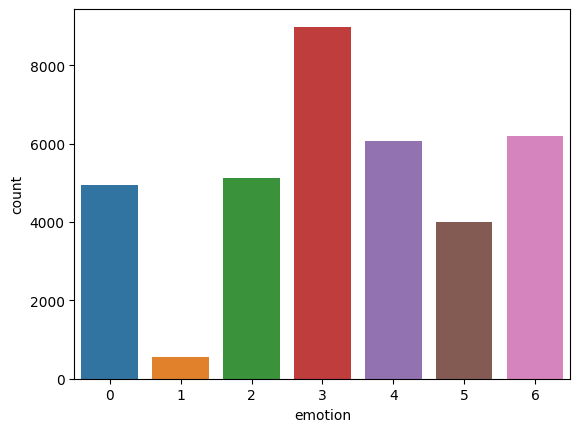

In [109]:
#using Seaborn to PLot 
sns.countplot(data=df, x='emotion')

# Show the plot
plt.show()

In [110]:
df["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

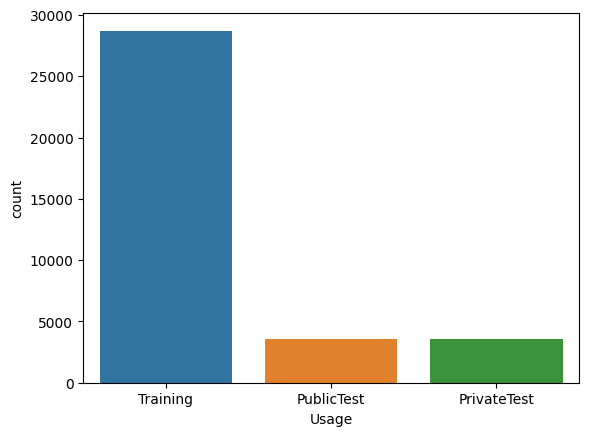

In [111]:
#using Seaborn to PLot 
sns.countplot(data=df, x='Usage')

# Show the plot
plt.show()

In [112]:
X_train,train_y,X_test,test_y=[],[],[],[]

In [113]:
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [114]:
# Data Imbalaced 
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE
sampling_strategy = {0: 8989, 1: 8989,2: 8989, 3: 8989,4: 8989, 5: 8989, 6: 8989} 

In [115]:
oversampler = SMOTE(sampling_strategy=sampling_strategy)


In [116]:
X_resampled, y_resampled = oversampler.fit_resample(X_train, train_y)


In [117]:
y_resampled_counts = Counter(y_resampled)
print("Resampled class distribution:", y_resampled_counts)

Resampled class distribution: Counter({0: 8989, 2: 8989, 4: 8989, 6: 8989, 3: 8989, 5: 8989, 1: 8989})


In [118]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [119]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')


In [120]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import to_categorical


In [121]:
train_y = to_categorical(train_y, num_classes=num_labels)
test_y = to_categorical(test_y, num_classes=num_labels)


In [122]:
#normalizing data between o and 1
# Z-Score 
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

In [123]:
X_train

array([[-0.6098866 , -0.4592209 , -0.40325198, ..., -0.08629682,
        -0.0573744 , -0.41127437],
       [ 0.37236458,  0.40461555,  0.41102034, ...,  1.0387505 ,
         0.8913998 ,  0.8866632 ],
       [ 1.3424892 ,  1.1697278 ,  0.52376574, ..., -0.31906524,
        -0.04455312,  0.47946712],
       ...,
       [-0.5613804 , -0.44688037, -0.34061563, ...,  0.97409266,
         0.9426849 ,  0.9248379 ],
       [ 1.2333502 ,  1.3548356 ,  1.1125473 , ...,  0.30165055,
         0.28879997,  0.2504193 ],
       [ 0.90593314,  1.0093011 ,  1.1376019 , ..., -1.3794547 ,
        -1.2625741 , -0.97116905]], dtype=float32)

In [124]:
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

In [125]:
X_test

array([[ 1.6505896 ,  1.7122597 ,  1.774942  , ..., -0.9225547 ,
         0.18117245,  0.80417955],
       [ 0.45219082,  0.84190166,  1.0658671 , ...,  0.73589116,
         0.6640275 ,  0.5656745 ],
       [-0.6116937 ,  0.02127829, -0.6688345 , ..., -0.33572   ,
        -0.35250947, -0.32558146],
       ...,
       [ 1.6628181 ,  1.7246933 ,  1.7876041 , ..., -0.84601104,
        -0.8226578 , -0.87790906],
       [-1.0519217 , -1.1350546 , -1.0486962 , ..., -1.4073311 ,
        -1.3944598 , -1.4051309 ],
       [-0.7095221 , -0.66257447, -0.6941586 , ..., -0.01678811,
         0.6386141 ,  0.80417955]], dtype=float32)

In [126]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [127]:
print(f"shape:{X_train.shape}")

shape:(28709, 48, 48, 1)


In [128]:
#designing the cnn

#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [129]:
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [130]:
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))


In [131]:
model.add(Flatten())

In [132]:
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))


In [133]:
model.add(Dense(num_labels, activation='softmax'))

In [134]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 conv2d_29 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 20, 20, 64)        36928     
                                                                 
 conv2d_31 (Conv2D)          (None, 18, 18, 64)        36928     
                                                      

In [135]:
#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/30
449/449 [==============================] - 757s 2s/step - loss: 1.7273 - accuracy: 0.2927 - val_loss: 1.5754 - val_accuracy: 0.3865
Epoch 2/30
449/449 [==============================] - 658s 1s/step - loss: 1.5188 - accuracy: 0.4052 - val_loss: 1.3938 - val_accuracy: 0.4578
Epoch 3/30
449/449 [==============================] - 658s 1s/step - loss: 1.4052 - accuracy: 0.4525 - val_loss: 1.3221 - val_accuracy: 0.4826
Epoch 4/30
449/449 [==============================] - 655s 1s/step - loss: 1.3442 - accuracy: 0.4808 - val_loss: 1.2793 - val_accuracy: 0.5052
Epoch 5/30
449/449 [==============================] - 664s 1s/step - loss: 1.2932 - accuracy: 0.5030 - val_loss: 1.2643 - val_accuracy: 0.5132
Epoch 6/30
321/449 [====================>.........] - ETA: 3:08 - loss: 1.2533 - accuracy: 0.5182

In [ ]:
#Saving the  model
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")
